### Proyecto final deep

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense


In [52]:
data = pd.read_csv('./data/data.csv')

In [53]:
data.head(5)

,num_corre,ano_ocu,dia_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,dia_sem_ocu,mupio_ocu,depto_ocu,...,g_edad_60ymas,edad_quinquenales,estado_con,mayor_menor,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,2017,1,1,1,1,1,7,101,1,...,6,8,1,1,12,7,7,1971,1,1
1,2,2017,1,1,1,1,1,7,101,1,...,6,8,2,1,1,28,2,9999,6,1
2,3,2017,1,2,1,1,1,7,110,1,...,3,5,2,1,4,18,1,9999,6,2
3,4,2017,1,10,2,1,1,7,504,5,...,3,5,9,1,14,6,1,2014,5,1
4,5,2017,1,10,2,1,1,7,504,5,...,4,6,9,1,1,69,4,1992,3,1


In [54]:
data.describe()

,num_corre,ano_ocu,dia_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,dia_sem_ocu,mupio_ocu,depto_ocu,...,g_edad_60ymas,edad_quinquenales,estado_con,mayor_menor,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
count,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000,...,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000,39088.000000
mean,4919.266245,2018.572784,15.718814,13.641424,2.866353,2.010003,6.573961,4.287684,709.373926,7.037275,...,6.577287,9.445559,5.770595,2.019904,9.042750,303.606708,27.173711,7328.940570,53.950292,2.108320
std,2876.618165,1.097248,8.816009,6.637545,1.060937,0.844030,3.570739,2.047558,694.065688,6.941449,...,3.493491,4.923453,3.856238,2.635430,21.813033,426.269658,40.943992,3769.647667,47.089783,1.944541
min,1.000000,2017.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,101.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1897.000000,1.000000,1.000000
25%,2443.750000,2018.000000,8.000000,9.000000,2.000000,1.000000,3.000000,2.000000,106.000000,1.000000,...,4.000000,6.000000,1.000000,1.000000,2.000000,27.000000,2.000000,2016.000000,5.000000,1.000000
50%,4886.500000,2019.000000,16.000000,15.000000,3.000000,2.000000,7.000000,5.000000,412.000000,4.000000,...,5.000000,7.000000,9.000000,1.000000,4.000000,67.000000,5.000000,9999.000000,99.000000,1.000000
75%,7329.250000,2020.000000,23.000000,19.000000,4.000000,3.000000,10.000000,6.000000,1301.000000,13.000000,...,10.000000,12.000000,9.000000,1.000000,4.000000,999.000000,14.000000,9999.000000,99.000000,3.000000
max,10827.000000,2020.000000,31.000000,23.000000,4.000000,3.000000,12.000000,7.000000,2217.000000,22.000000,...,16.000000,18.000000,9.000000,9.000000,99.000000,999.000000,99.000000,9999.000000,99.000000,99.000000


In [55]:
data.shape

(39088, 24)

In [56]:
data.dtypes

num_corre            int64
ano_ocu              int64
dia_ocu              int64
hora_ocu             int64
g_hora               int64
g_hora_5             int64
mes_ocu              int64
dia_sem_ocu          int64
mupio_ocu            int64
depto_ocu            int64
zona_ocu             int64
sexo_per             int64
edad_per             int64
g_edad_80ymas        int64
g_edad_60ymas        int64
edad_quinquenales    int64
estado_con           int64
mayor_menor          int64
tipo_veh             int64
marca_veh            int64
color_veh            int64
modelo_veh           int64
g_modelo_veh         int64
tipo_eve             int64
dtype: object

In [57]:
print(data.isnull().sum())

num_corre            0
ano_ocu              0
dia_ocu              0
hora_ocu             0
g_hora               0
g_hora_5             0
mes_ocu              0
dia_sem_ocu          0
mupio_ocu            0
depto_ocu            0
zona_ocu             0
sexo_per             0
edad_per             0
g_edad_80ymas        0
g_edad_60ymas        0
edad_quinquenales    0
estado_con           0
mayor_menor          0
tipo_veh             0
marca_veh            0
color_veh            0
modelo_veh           0
g_modelo_veh         0
tipo_eve             0
dtype: int64


In [58]:
print(data.nunique())

num_corre            10827
ano_ocu                  4
dia_ocu                 31
hora_ocu                24
g_hora                   4
g_hora_5                 3
mes_ocu                 12
dia_sem_ocu              7
mupio_ocu              335
depto_ocu               22
zona_ocu                23
sexo_per                 3
edad_per                88
g_edad_80ymas           16
g_edad_60ymas           13
edad_quinquenales       18
estado_con               3
mayor_menor              3
tipo_veh                20
marca_veh              145
color_veh               17
modelo_veh              59
g_modelo_veh             7
tipo_eve                 9
dtype: int64


### Limpiar la data


In [59]:
# data = data[data['hora_ocu'] != 99]
# data = data[data['zona_ocu'] != 99]
# data = data[data['tipo_veh'] != 99]
# data = data[data['marca_veh'] != 99]
# data = data[data['color_veh'] != 99]
# data = data[data['modelo_veh'] != 9999]
# data = data[data['g_modelo_veh'] != 99]
# data = data[data['tipo_eve'] != 99]
data = data[data['tipo_veh'] != 99]



In [60]:
data.shape

(36950, 24)

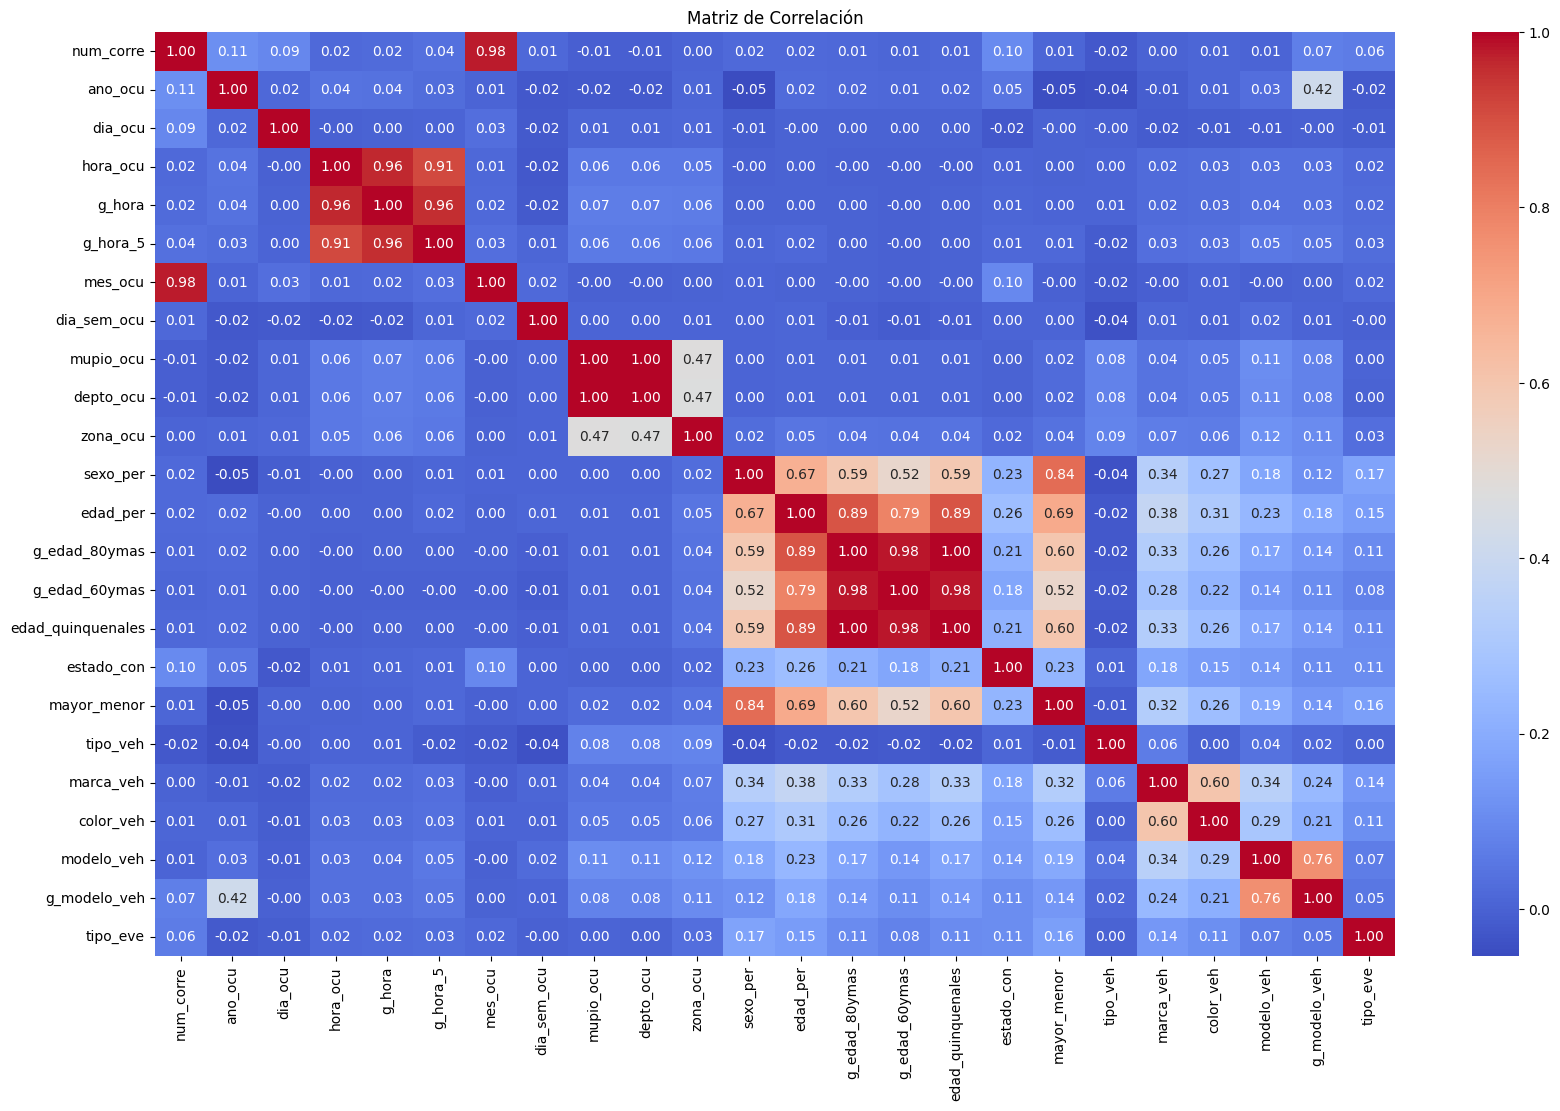

In [61]:
correlation_matrix = data.corr()

# Configuración de la visualización con Seaborn
plt.figure(figsize=(20, 12))  # Establece el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Crea el mapa de calor con anotaciones y colores

# Configuración adicional (opcional)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# variables color_veh , mayor_menor, edad_per, sexo_per

In [62]:
label_encoder = LabelEncoder()
data['tipo_veh'] = label_encoder.fit_transform(data['color_veh'])

In [63]:
features = data[['color_veh', 'mayor_menor', 'edad_per', 'sexo_per']]
target = data['tipo_veh']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [65]:
model = Sequential()
model.add(Dense(256, input_dim=features.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(20, activation='softmax'))  # Capa de salida con activación softmax para clasificación multiclase

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               1280      
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 20)                660       
                                                                 
Total params: 45,172
Trainable params: 45,172
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [67]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
924/924 [==============================] - 2s 1ms/step - loss: 1.2488 - accuracy: 0.6402 - val_loss: 0.4805 - val_accuracy: 0.8825
Epoch 2/10
924/924 [==============================] - 1s 1ms/step - loss: 0.3473 - accuracy: 0.8898 - val_loss: 0.3198 - val_accuracy: 0.8806
Epoch 3/10
924/924 [==============================] - 1s 1ms/step - loss: 0.2538 - accuracy: 0.9134 - val_loss: 0.3061 - val_accuracy: 0.8897
Epoch 4/10
924/924 [==============================] - 1s 1ms/step - loss: 0.2186 - accuracy: 0.9214 - val_loss: 0.1532 - val_accuracy: 0.9484
Epoch 5/10
924/924 [==============================] - 1s 1ms/step - loss: 0.2166 - accuracy: 0.9248 - val_loss: 0.3570 - val_accuracy: 0.8693
Epoch 6/10
924/924 [==============================] - 1s 1ms/step - loss: 0.1913 - accuracy: 0.9309 - val_loss: 0.1323 - val_accuracy: 0.9497
Epoch 7/10
924/924 [==============================] - 1s 1ms/step - loss: 0.1470 - accuracy: 0.9437 - val_loss: 0.1085 - val_accuracy: 0.9691
Epoch 

Text(0, 0.5, 'Training Error')

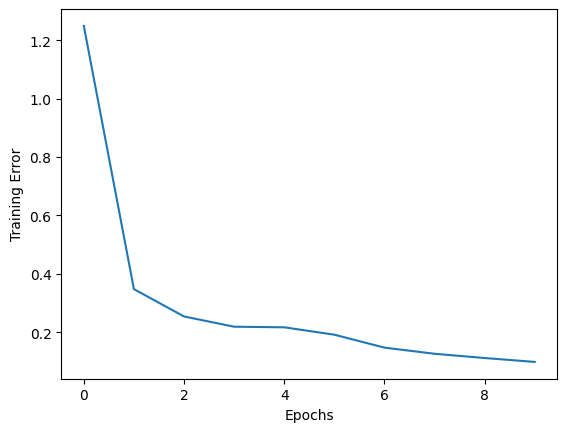

In [68]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [69]:
X_test

,color_veh,mayor_menor,edad_per,sexo_per
24069,99,1,999,1
26037,1,1,18,1
34722,6,1,31,1
6755,1,1,43,1
29907,99,1,999,1
...,...,...,...,...
20925,99,1,999,1
19572,99,1,35,1
21777,1,1,37,1
23320,2,1,36,1


In [70]:
y_test

24069    16
26037     0
34722     5
6755      0
29907    16
         ..
20925    16
19572    16
21777     0
23320     1
7244      3
Name: tipo_veh, Length: 7390, dtype: int64

In [49]:
predictions = model.predict(X_test)

245/245 [==============================] - 0s 663us/step


In [89]:
columnas = ['color_veh', 'mayor_menor', 'edad_per', 'sexo_per']
datos =  [[7,1,37,1]]
datos2 = [[]]
prueba = pd.DataFrame(datos, columns=columnas)
predictions = model.predict(prueba)
predicted_classes = predictions.argmax(axis=-1)
predicted_classes = label_encoder.inverse_transform(predicted_classes)
predicted_classes.tolist()
prediccion = predicted_classes[0]
print(prediccion)


1/1 [==============================] - 0s 24ms/step
7


In [87]:
import joblib

In [88]:
model.save('./modelos/modelo1.0.h5')
joblib.dump(label_encoder, './modelos/label_encoder.pkl')

['./modelos/label_encoder.pkl']